In [ ]:
# Copyright 2021 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
#
# Author: Dheeraj Bharti, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

In [ ]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Upload 'pic3.png' file manually to your google colab working directory:

1. Click on the folder drawing button on the left below the <> sign.
2. Click on Upload to session storage button to upload the image.

In [ ]:
img = cv2.imread("pic3.png")

In [ ]:
def resize_nn(img, k=1):
    '''
    Write a program to resample the given image by a factor 'k' using Nearest Neighbour method
    
    Inputs:
    + img - Original image
    + k - resampling factor, therefore if input image size is 300x300 
        - and k=0.5 ==> output image size = 150x150
    
    Ouputs:
    + img_out - numpy array (of dtype np.uint8) containing the output image.
    
    Allowed external package:
    + You are not allowed to use any cv2 resize module or any other external package. 
    
    '''
    
    #############################
    # Start your code from here #
    #############################

    w = img.shape[0]*k
    h = img.shape[1]*k
    c = img.shape[2]
    img_out=np.zeros((int(w),int(h),c), dtype=np.uint8)
    for i in range (0, img_out.shape[0]):
      for j in range (0, img_out.shape[1]):
          m=int(np.round(i/k))
          n=int(np.round(j/k))
          img_out[i,j,:]=img[m,n,:]
          
    #############################
    # End your code here #######
    #############################    
    
    return np.uint8(img_out)

In [ ]:
def resize_bilinear(img, k=1):
    '''
    Write a program to resample the given image by a factor 'k' using Bilinear interpolation method.
    
    Inputs:
    + img - Original image
    + k - resampling factor
    
    Ouputs:
    + img_out - numpy array (of dtype np.uint8) containing the output image.
    
    Allowed external package:
    + You are not allowed to use any cv2 resize module or any other external package. 
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    w = img.shape[0]*k
    h = img.shape[1]*k
    c = img.shape[2]
    img_out=np.zeros((int(w),int(h),c), dtype=np.uint8)
    d = np.zeros((4,1),dtype=np.float)
    for i in range(img_out.shape[0]):
      for j in range(img_out.shape[1]):
          x = [int(np.floor(i/k)),int(np.ceil(i/k))]
          y = [int(np.floor(j/k)),int(np.ceil(j/k))]
          d[0] = math.sqrt((x[0]-i)**2 + (y[0]-j)**2)+0.0001
          d[1] = math.sqrt((x[0]-i)**2 + (y[1]-j)**2)+0.0001
          d[2] = math.sqrt((x[1]-i)**2 + (y[0]-j)**2)+0.0001
          d[3] = math.sqrt((x[1]-i)**2 + (y[1]-j)**2)+0.0001
          d = d/sum(d)
          img_out[i,j,:] = d[0]*img[x[0],y[0],:]+d[1]*img[x[0],y[1],:]+d[2]*img[x[1],y[0],:]+d[3]*img[x[1],y[1],:]

    #############################
    # End your code here ########
    #############################    
    
    return np.uint8(img_out)

# Checking the output:

Resize the image by utilizing output1 and output2 in the code block below and plot the original and resized images side by side in both cases.



(416, 620, 3) (249, 372, 3) (166, 248, 3)


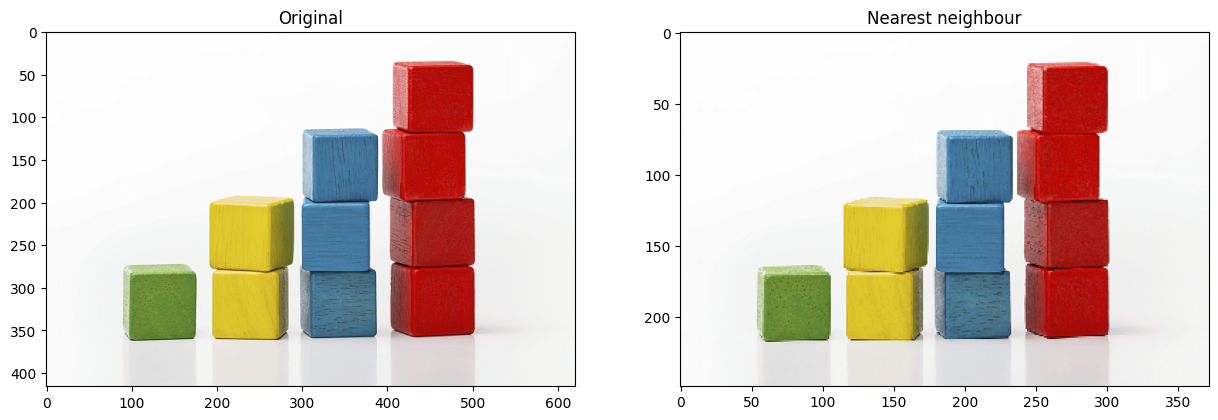

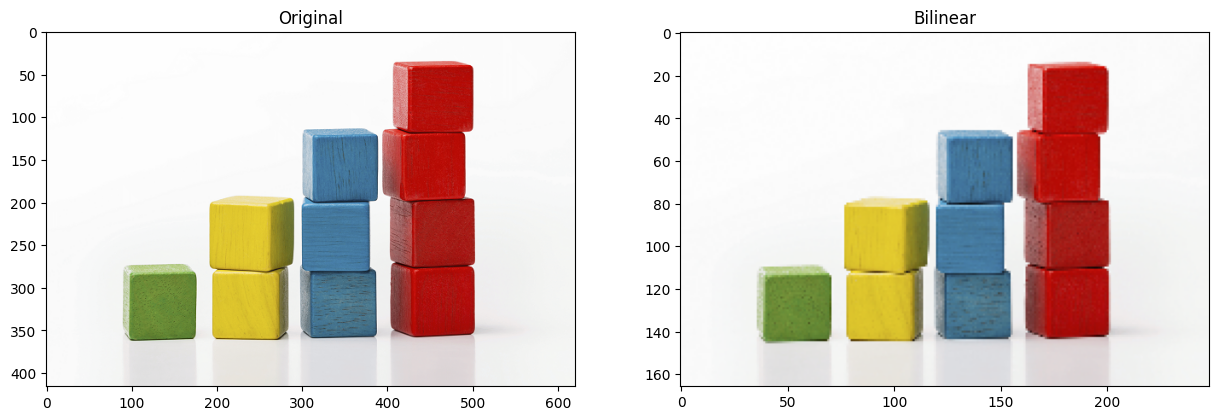

In [ ]:
output1 = resize_nn(img, k=0.6)
output2 = resize_bilinear(img, k=0.4) 

#############################
# Start your code from here #
#############################
plt.figure(figsize=[15,15], dpi=100)
plt.subplot(1, 2, 1); plt.title("Original")
img_out = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_out)
plt.subplot(1, 2, 2); plt.title("Nearest neighbour")
img_out1 = cv2.cvtColor(output1, cv2.COLOR_BGR2RGB)
plt.imshow(img_out1)
print()
plt.figure(figsize=[15,15], dpi=100)
plt.subplot(1, 2, 1); plt.title("Original")
img_out = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_out)
plt.subplot(1, 2, 2); plt.title("Bilinear")
img_out2 = cv2.cvtColor(output2, cv2.COLOR_BGR2RGB)
plt.imshow(img_out2)
print(img_out.shape,img_out1.shape,img_out2.shape)
#cv2_imshow(img_out1)
#############################
# End your code here ########
#############################

In [5]:
your_observation = """In the Nearest Neighbour method at factor k=0.6, giving sharp edges in the output image and mainly containing the values of original image details.
In Bilinear interpolation method giving weighted average of four surrounding cells and at k=0.4, it is giving more smoothness in output image
specifically, in Qualitative data analysis Nearest neighbour method is applicable to use when given data to be preserved but in case of 
Bilinear interpolation method which is not applicable."""

print(your_observation)

In the Nearest Neighbour method at factor k=0.6, giving sharp edges in the output image and mainly containing the values of original image details.
In Bilinear interpolation method giving weighted average of four surrounding cells and at k=0.4, it is giving more smoothness in output image
specifically, in Qualitative data analysis Nearest neighbour method is applicable to use when given data to be preserved but in case of 
Bilinear interpolation method which is not applicable.
